In [1]:
!pip install --upgrade keras
!pip install --upgrade matplotlib
!pip install --upgrade numpy
!pip install --upgrade tensorflow
!pip install --upgrade pandas
!pip install --upgrade pactools

Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.3.1)
Requirement already up-to-date: matplotlib in /usr/local/lib/python3.6/dist-packages (3.2.1)
Requirement already up-to-date: numpy in /usr/local/lib/python3.6/dist-packages (1.18.2)
Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.2.0rc2)
Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (1.0.3)
     |████████████████████████████████| 71kB 1.2MB/s 
  Created wheel for pactools: filename=pactools-0.2.0b0-cp36-none-any.whl size=81682 sha256=7ec148100be0b9d4130a489d19e2e6d5221c18de0e2cf56fc201eb0d2edf6cea
  Stored in directory: /root/.cache/pip/wheels/5b/a6/57/f1df50567735175243e07792baced6076d67ab30ca1c138b71
Successfully built pactools


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import MaxNLocator

#TESNORFOW
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

#KERAS LIBRARIES
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, Dropout , Flatten,BatchNormalization,Conv2D,MaxPooling2D, Activation
from keras.regularizers import l1, l2, l1_l2
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend 
from keras.utils import np_utils
from keras.utils import to_categorical

#CROSS VALIDATION
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from pactools.grid_search import GridSearchCVProgressBar

#WRAPPERS NEEDED FOR GRIDSEARCH
from keras.wrappers.scikit_learn import KerasClassifier
from keras.wrappers.scikit_learn import KerasRegressor

Using TensorFlow backend.


## CNN EXAMPLES


In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()


train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']



170500096/170498071 [==============================] - 11s 0us/step


In [4]:
print(train_labels[0])

[6]


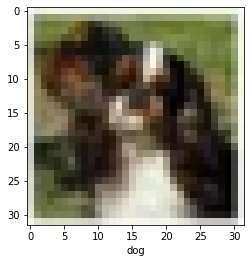

In [5]:
IMG_INDEX = 500 # change this to look at other images

plt.imshow(train_images[IMG_INDEX] ,cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

In [6]:
print('Μέγεθος Δεδομένων: {}'.format(train_images[0].shape))

Μέγεθος Δεδομένων: (32, 32, 3)


In [0]:
def conv():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
  model.add(layers.BatchNormalization())
  model.add(layers.Convolution2D(32, (3, 3), activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Convolution2D(8, (3, 3), activation='relu')) # 26
  model.add(layers.BatchNormalization()) # change 1
  model.add(layers.Convolution2D(16, (3, 3), activation='relu')) # 24
  model.add(layers.MaxPooling2D(pool_size=(2, 2))) # 12
  model.add(layers.Convolution2D(16, (3, 3), activation='relu')) # 10
  model.add(layers.Convolution2D(16, (3, 3), activation='relu')) # 6
  model.add(layers.BatchNormalization()) # change 1
  model.add(layers.Convolution2D(20, (3, 3), activation='relu')) # 4
  model.add(layers.BatchNormalization()) # change 1
  model.add(layers.Convolution2D(10, (1, 1) ,activation='relu')) #4
  #model.add(layers.Convolution2D(10, (4,4),activation='relu')
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(10,activation='softmax'))

  model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.003),
                  loss=tf.keras.losses.CategoricalCrossentropy(),
                  metrics=['accuracy'])
  
  return model

def conv1():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(10,activation='softmax'))

  model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
  
  return model

def conv2():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(10,activation='softmax'))

  model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])
  
  return model

def train(model,train_images,train_labels,test_images,test_labels):

  history = model.fit(train_images, train_labels, epochs=20, batch_size=64,
                        validation_data=(test_images, test_labels),verbose=1)

  test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)

  print(test_acc)
  return history


In [0]:
def pff(h_base,titlos): #Plot For Fitting-Συνάρτηση για να βλέπουμε το capacity δηλαδή το overfitting - underfitting
  ax = plt.figure().gca()
  ax.plot(h_base.epoch, h_base.history['loss'], h_base.epoch, h_base.history['val_loss'])

  ax.xaxis.set_major_locator(MaxNLocator(integer=True))

  plt.title(titlos)
  plt.ylabel('Αντικειμενική Συνάρτηση')
  plt.xlabel('Εποχή')
  plt.legend(loc=1, labels=("Train Error", 'Test Error'))
  plt.show()

In [0]:
model=conv()
model1=conv1()
model2=conv2()

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 8)         2312      
_________________________________________________________________
batch_normalization_2 (Batch (None, 26, 26, 8)         32        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 16)        1

Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20


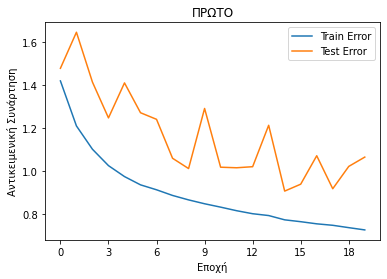

In [18]:
h=train(model,train_images,train_labels,test_images,test_labels)
#h1=train(model1,train_images,train_labels,test_images,test_labels)
#h2=train(model2,train_images,train_labels,test_images,test_labels)
pff(h,'ΠΡΩΤΟ')
#pff(h1,'ΔΕΥΤΕΡΟ')
#pff(h2,'ΤΡΙΤΟ')

Epoch 1/20
782/782 [==============================] - 60s 76ms/step - loss: 2.0996 - accuracy: 0.3538 - val_loss: 2.0269 - val_accuracy: 0.4305
Epoch 2/20
782/782 [==============================] - 58s 74ms/step - loss: 2.0024 - accuracy: 0.4566 - val_loss: 1.9819 - val_accuracy: 0.4756
Epoch 3/20
782/782 [==============================] - 58s 74ms/step - loss: 1.9454 - accuracy: 0.5155 - val_loss: 1.9253 - val_accuracy: 0.5363
Epoch 4/20
782/782 [==============================] - 59s 76ms/step - loss: 1.9055 - accuracy: 0.5559 - val_loss: 1.8988 - val_accuracy: 0.5642
Epoch 5/20
782/782 [==============================] - 59s 76ms/step - loss: 1.8715 - accuracy: 0.5908 - val_loss: 1.8725 - val_accuracy: 0.5873
Epoch 6/20
782/782 [==============================] - 58s 75ms/step - loss: 1.8504 - accuracy: 0.6115 - val_loss: 1.8709 - val_accuracy: 0.5881
Epoch 7/20
782/782 [==============================] - 57s 73ms/step - loss: 1.8313 - accuracy: 0.6307 - val_loss: 1.8356 - val_accuracy:

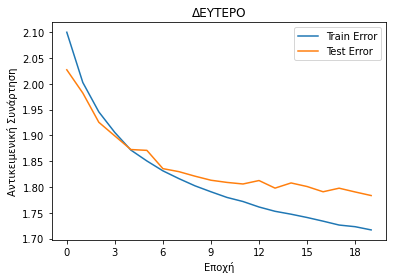

In [28]:
h1=train(model1,train_images,train_labels,test_images,test_labels)
pff(h1,'ΔΕΥΤΕΡΟ')

## DATA AUGMENTATION

In [0]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

#Normalize
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [17]:
print('Μέγεθος Δεδομένων Ελέγχου: {}'.format(test_labels.shape))

Μέγεθος Δεδομένων Ελέγχου: (10000, 1)


In [0]:
#Θα χρησιμοποιήσω SOFTMAX  αρα κάνω one hot

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [19]:
print('Μέγεθος Δεδομένων Εκπαίδευσης: {}'.format(train_images.shape))
print('Μέγεθος Δεδομένων Ελέγχου: {}'.format(test_images.shape))
print('Μέγεθος Δεδομένων Ελέγχου: {}'.format(test_labels.shape))

Μέγεθος Δεδομένων Εκπαίδευσης: (50000, 32, 32, 3)
Μέγεθος Δεδομένων Ελέγχου: (10000, 32, 32, 3)
Μέγεθος Δεδομένων Ελέγχου: (10000, 10)


In [0]:
def mod():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3))) #32->30
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))#30->15

  model.add(Conv2D(32, (3, 3)))#15->13
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))#13->6

  model.add(Conv2D(64, (3, 3)))#6->4
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))#4->2

  model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
  model.add(Dense(64))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(10,activation="softmax"))
  

  model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
  return model

In [0]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

# creates a data generator object that transforms images
datagen_train = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

datagen_train.fit(train_images)


In [22]:
augmodel=conv()
augmodel.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_5 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_6 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 26, 26, 8)         2312      
_________________________________________________________________
batch_normalization_7 (Batch (None, 26, 26, 8)         32        
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 24, 24, 16)       

In [100]:
augmodel.fit_generator(datagen_train.flow(train_images,train_labels, batch_size=32),
                    steps_per_epoch=len(train_images) / 32, epochs=5 )

test_loss, test_acc = augmodel.evaluate(test_images,  test_labels, verbose=1)
print(test_acc)

Epoch 1/5
1563/1562 [==============================] - 228s 146ms/step - loss: 1.9104 - accuracy: 0.2868
Epoch 2/5
1563/1562 [==============================] - 231s 148ms/step - loss: 1.7377 - accuracy: 0.3572
Epoch 3/5
1563/1562 [==============================] - 230s 147ms/step - loss: 1.6441 - accuracy: 0.3943
Epoch 4/5
1563/1562 [==============================] - 232s 148ms/step - loss: 1.5841 - accuracy: 0.4200
Epoch 5/5
313/313 [==============================] - 10s 31ms/step - loss: 1.4683 - accuracy: 0.4590
0.45899999141693115


## PRETRAINED


To CNN χωρις κάποια dense layers στο τέλος δεν έχει καμια δυνατότητα , το μόνο που έχει κάνει είναι να αναγνωρίζει πρότυπα (γραμμές , μοτίβα κτλπ) , επομένως αν ένα CNN έχει εκπαιδεύτει με πάρα πολλές σχετικές εικόνες μπορούμε να το πάρουμε εμείς να το παγώσουμε και να προσθέσουμε στο τέλος τα dense layers που θα αντιπροσωπευουν το classification που θέλουμε 

In [23]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# split the data manually into 80% training, 10% testing, 10% validation
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/lib/python3.6/concurrent/futures/thread.py:56: ResourceWarning: unclosed <ssl.SSLSocket fd=64, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 33566), raddr=('23.193.24.126', 443)>
  result = self.fn(*self.args, **self.kwargs)


Shuffling and writing examples to /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteC0ZQD4/cats_vs_dogs-train.tfrecord
Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


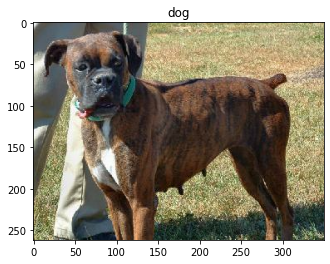

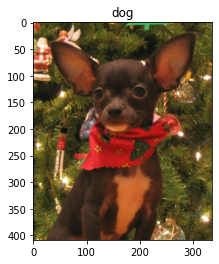

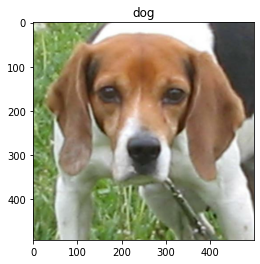

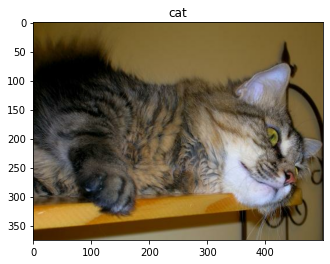

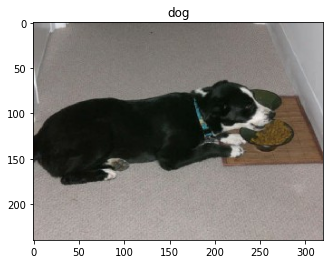

In [25]:
get_label_name = metadata.features['label'].int2str  # creates a function object that we can use to get labels

# display 2 images from the dataset
for image, label in raw_train.take(5):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

!!! Format Function , Desired Size

In [0]:
IMG_SIZE = 160 # All images will be resized to 160x160

def format_example(image, label):
  """
  returns an image that is reshaped to IMG_SIZE
  """
  image = tf.cast(image, tf.float32)
  image = (image/256)
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  return image, label

In [0]:
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

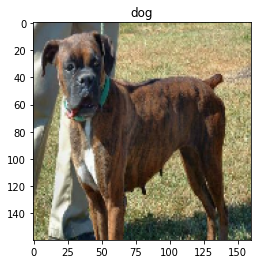

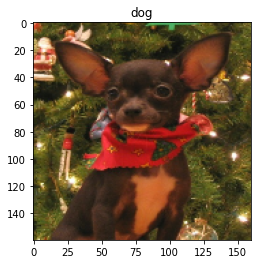

In [42]:
for image, label in train.take(2):
  plt.figure()
  plt.imshow(image,cmap=plt.cm.binary)
  plt.title(get_label_name(label))

In [0]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

In [43]:
for img, label in raw_train.take(2):
  print("Original shape:", img.shape)

for img, label in train.take(2):
  print("New shape:", img.shape)

Original shape: (262, 350, 3)
Original shape: (409, 336, 3)
New shape: (160, 160, 3)
New shape: (160, 160, 3)


**Picking Pretrained Model**

In [45]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9412608/9406464 [==============================] - 0s 0us/step


In [46]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 161, 161, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

In [47]:
for image, _ in train_batches.take(1):
   pass

feature_batch = base_model(image)
print(feature_batch.shape)

(32, 5, 5, 1280)


At this point this *base_model* will simply output a shape (32, 5, 5, 1280) tensor that is a feature extraction from our original (1, 160, 160, 3) image. The 32 means that we have 32 layers of differnt filters/features. We see NONE from summary, unknown value until we pass our input


In [49]:
base_model.trainable = False
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 161, 161, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

In [0]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = keras.layers.Dense(1)
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

In [52]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

initial_epochs = 3
validation_steps=20

loss0,accuracy0 = model.evaluate(validation_batches, steps = validation_steps)

20/20 [==============================] - 11s 568ms/step - loss: 0.5723 - accuracy: 0.6922


Train will take forever!

In [51]:
'''
history = model.fit(train_batches,
                    epochs=initial_epochs,
                    validation_data=validation_batches)

acc = history.history['accuracy']
print(acc)
'''

"\nhistory = model.fit(train_batches,\n                    epochs=initial_epochs,\n                    validation_data=validation_batches)\n\nacc = history.history['accuracy']\nprint(acc)\n"